In [1]:
import pandas as pd
import numpy as np
import os
from config import C_COMMON, C_SINGLE, C_GRID
from copy import deepcopy
import time
import matplotlib.pyplot as plt

# import models
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')

# -both

In [3]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet', 'elevation']:
    columns.remove(r)

In [4]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [5]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 3, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_split=3,
        n_jobs=-1,
        max_samples=0.9,
        verbose=False,
    )
# {'n_estimators': 230, 'learning_rate': 0.10280283679144198, 'max_depth': 8, 'gamma': 1.3980798529494143, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=230,
        learning_rate=0.10280283679144198,
        max_depth=8,
        gamma=1.3980798529494143,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_base = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_base=}")

mse_base=[28.441917290043204, 16.05060261612638, 14.797502190478758]
mse_base=[28.441917290043204, 16.005512575914732, 14.994085976683113]
mse_base=[28.441917290043204, 15.830165296390414, 14.998828705338129]
mse_base=[28.441917290043204, 16.01332550798357, 15.138467844416017]
mse_base=[28.441917290043204, 15.874651872877877, 14.897695243254507]


# - elevation

In [6]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'elevation']:
    columns.remove(r)

In [7]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [8]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 170, 'max_depth': None, 'min_samples_split': 4, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=170,
        max_depth=None,
        min_samples_split=4,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 230, 'learning_rate': 0.059111231114679086, 'max_depth': 9, 'gamma': 0.5864807118467834, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=230,
        learning_rate=0.059111231114679086,
        max_depth=9,
        gamma=0.5864807118467834,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_season = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_season=}")

mse_season=[28.28869614325506, 15.785690293472552, 14.799707818146116]
mse_season=[28.28869614325506, 15.593611442260926, 14.38357071100375]
mse_season=[28.28869614325506, 15.652766688739858, 14.531793648269039]
mse_season=[28.28869614325506, 15.661168944191925, 14.418745314520383]
mse_season=[28.28869614325506, 15.677204409229171, 14.567720316976335]


# - seasonal

In [9]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in', 'season_wet']:
    columns.remove(r)

In [10]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [11]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 250, 'max_depth': None, 'min_samples_split': 2, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=250,
        max_depth=None,
        min_samples_split=2,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 250, 'learning_rate': 0.06920452295047647, 'max_depth': 9, 'gamma': 0.8394660529847431, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=250,
        learning_rate=0.06920452295047647,
        max_depth=9,
        gamma=0.8394660529847431,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_elevation = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_elevation=}")

mse_elevation=[28.244099285990192, 15.69056779620483, 14.565783093123592]
mse_elevation=[28.244099285990192, 15.729614146740058, 14.546645023303531]
mse_elevation=[28.244099285990192, 15.705293440017003, 14.708041892899528]
mse_elevation=[28.244099285990192, 15.690994375927922, 14.547056981508897]
mse_elevation=[28.244099285990192, 15.693218944879275, 14.535561345396665]


# base

In [12]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [13]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [14]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 4, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=4,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 290, 'learning_rate': 0.07060599933250315, 'max_depth': 9, 'gamma': 1.6624472756128377, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=290,
        learning_rate=0.07060599933250315,
        max_depth=9,
        gamma=1.6624472756128377,
        verbosity=0,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(200)
    )
    
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_both = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_both=}")

mse_both=[28.103742379201332, 15.502646234168711, 14.389961242275575]
mse_both=[28.103742379201332, 15.448611775830722, 14.343760692072244]
mse_both=[28.103742379201332, 15.381690789666262, 14.339739555036964]
mse_both=[28.103742379201332, 15.513950610992689, 14.139265357490848]
mse_both=[28.103742379201332, 15.413886710498717, 14.379458164251638]


In [15]:
print('experiment complete')

experiment complete


# aggregate the result

In [30]:
mse_minus_both = np.array([
    [28.441917290043204, 16.05060261612638, 14.797502190478758],
    [28.441917290043204, 16.005512575914732, 14.994085976683113],
    [28.441917290043204, 15.830165296390414, 14.998828705338129],
    [28.441917290043204, 16.01332550798357, 15.138467844416017],
    [28.441917290043204, 15.874651872877877, 14.897695243254507],
])
    
mse_minus_elevation = np.array([
    [28.28869614325506, 15.785690293472552, 14.799707818146116],
    [28.28869614325506, 15.593611442260926, 14.38357071100375],
    [28.28869614325506, 15.652766688739858, 14.531793648269039],
    [28.28869614325506, 15.661168944191925, 14.418745314520383],
    [28.28869614325506, 15.677204409229171, 14.567720316976335],
])

mse_minus_seasonal = np.array([
    [28.244099285990192, 15.69056779620483, 14.565783093123592],
    [28.244099285990192, 15.729614146740058, 14.546645023303531],
    [28.244099285990192, 15.705293440017003, 14.708041892899528],
    [28.244099285990192, 15.690994375927922, 14.547056981508897],
    [28.244099285990192, 15.693218944879275, 14.535561345396665],
])
mse_base = np.array([  
    [28.103742379201332, 15.502646234168711, 14.389961242275575],
    [28.103742379201332, 15.448611775830722, 14.343760692072244],
    [28.103742379201332, 15.381690789666262, 14.339739555036964],
    [28.103742379201332, 15.513950610992689, 14.139265357490848],
    [28.103742379201332, 15.413886710498717, 14.379458164251638],
])

In [35]:
rmse_base = np.sqrt(mse_base).mean(axis=0)
rmse_minus_seasonal = np.sqrt(mse_minus_seasonal).mean(axis=0)
rmse_minus_elevation = np.sqrt(mse_minus_elevation).mean(axis=0)
rmse_minus_both = np.sqrt(mse_minus_both).mean(axis=0)

std_base = np.sqrt(mse_base).std(axis=0)
std_minus_seasonal = np.sqrt(mse_minus_seasonal).std(axis=0)
std_minus_elevation = np.sqrt(mse_minus_elevation).std(axis=0)
std_minus_both = np.sqrt(mse_minus_both).std(axis=0)

In [36]:
[rmse_base, rmse_minus_seasonal, rmse_minus_elevation, rmse_minus_both]

[array([5.30129629, 3.93091793, 3.78395158]),
 array([5.31451778, 3.96256662, 3.8184482 ]),
 array([5.31871189, 3.95904358, 3.81312725]),
 array([5.33309641, 3.99433788, 3.86847515])]

In [37]:
[std_base, std_minus_seasonal, std_minus_elevation, std_minus_both]

[array([0.        , 0.00643863, 0.01214183]),
 array([0.        , 0.00187303, 0.00842582]),
 array([0.        , 0.00789419, 0.01918691]),
 array([0.        , 0.01079313, 0.0146982 ])]

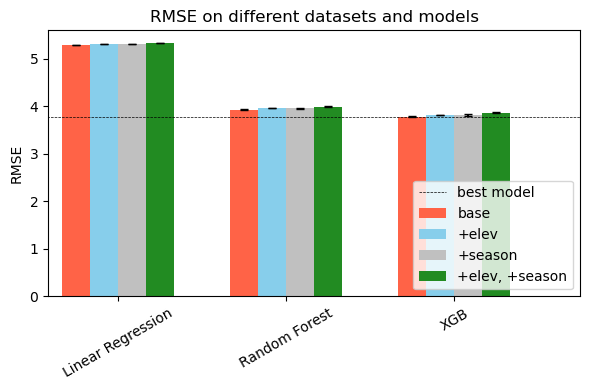

In [41]:
min_value = np.min([rmse_base, rmse_minus_seasonal, rmse_minus_elevation, rmse_minus_both])

n_bars=3
width = 1/(n_bars + 3)

fig, ax = plt.subplots(1, dpi=100)
colors = ['tomato', 'skyblue', 'silver', 'forestgreen']
for i, (mean, std) in enumerate(zip(
    [rmse_base, rmse_minus_seasonal, rmse_minus_elevation, rmse_minus_both],
    [std_base, std_minus_seasonal, std_minus_elevation, std_minus_both]
)):
    ax.bar(
        x=np.arange(3) + i * width,
        height=mean,
        width=width,
        color=colors[i],
        yerr=std,
        capsize=3,
    )
ax.set_xlim((-width,3))
ax.hlines(y=min_value, xmin=-1, xmax=4, linestyle="--", color="k", linewidth=0.5)

ax.set_xticks(np.arange(3) + width * 1.5)
ax.set_xticklabels(["Linear Regression", "Random Forest", "XGB"], rotation=30)
ax.legend(labels=["best model", "base", "+elev", "+season", "+elev, +season"], loc="lower right")
ax.set_ylabel("RMSE")
ax.set_title("RMSE on different datasets and models")
print()
plt.tight_layout()


# interpolation data

In [16]:
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_50.csv')

In [17]:
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [18]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)

In [19]:
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [20]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 110, 'max_depth': None, 'min_samples_split': 3, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=110,
        max_depth=None,
        min_samples_split=3,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 170, 'learning_rate': 0.1779220800600283, 'max_depth': 7, 'gamma': 0.07281476022339861, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=170,
        learning_rate=0.1779220800600283,
        max_depth=7,
        gamma=0.07281476022339861,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.870810435701756, 16.8824847147644, 16.737484525791412]
mse_50=[30.870810435701756, 16.913638100244494, 16.99915672927188]
mse_50=[30.870810435701756, 16.745693224147132, 16.797468005321996]
mse_50=[30.870810435701756, 16.89615269058676, 16.797637319701902]
mse_50=[30.870810435701756, 16.72217512689879, 17.25199732536845]


In [21]:
# interp 100
import pandas as pd
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_interp_100.csv')
# interp does not have season_wet, so include here
df['season_wet'] = df.apply(lambda row: 1 if row['month'] < 5 or row['month'] > 10 else 0, axis=1) # May - Oct is dry

In [22]:
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

# Define columns: lat, lon and 16 reanalysis variables
columns = deepcopy(C_SINGLE + C_COMMON)
for r in ['fold', 'skn', 'year', 'month', 'data_in']:
    columns.remove(r)
    
Xtrain, Ytrain = np.array(df_train[columns]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[columns]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[columns]), np.array(df_test['data_in'])

In [23]:
for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 280, 'max_depth': None, 'min_samples_split': 2, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=280,
        max_depth=None,
        min_samples_split=2,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 200, 'learning_rate': 0.1381558613341375, 'max_depth': 8, 'gamma': 1.6222446682223346, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=200,
        learning_rate=0.1381558613341375,
        max_depth=8,
        gamma=1.6222446682223346,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[30.869342829328556, 16.563310406906403, 16.261630792557796]
mse_50=[30.869342829328556, 16.612080456784742, 17.46244357480626]
mse_50=[30.869342829328556, 16.60250226685596, 16.6883514757907]
mse_50=[30.869342829328556, 16.56210649895411, 16.415629620260457]
mse_50=[30.869342829328556, 16.681543270242756, 16.308968758678237]


In [42]:
mse_50 = np.array([
    [30.870810435701756, 16.8824847147644, 16.737484525791412],
    [30.870810435701756, 16.913638100244494, 16.99915672927188],
    [30.870810435701756, 16.745693224147132, 16.797468005321996],
    [30.870810435701756, 16.89615269058676, 16.797637319701902],
    [30.870810435701756, 16.72217512689879, 17.25199732536845],
])
mse_100 = np.array([
    [30.869342829328556, 16.563310406906403, 16.261630792557796],
    [30.869342829328556, 16.612080456784742, 17.46244357480626],
    [30.869342829328556, 16.60250226685596, 16.6883514757907],
    [30.869342829328556, 16.56210649895411, 16.415629620260457],
    [30.869342829328556, 16.681543270242756, 16.308968758678237],
])

rmse_50 = np.sqrt(mse_50).mean(axis=0)
rmse_100 = np.sqrt(mse_100).mean(axis=0)
std_50 = np.sqrt(mse_50).std(axis=0)
std_100 = np.sqrt(mse_100).std(axis=0)

[rmse_50, rmse_100]

[array([5.55615069, 4.10267366, 4.11293327]),
 array([5.55601861, 4.07483497, 4.07731501])]

In [43]:
[std_50, std_100]

[array([0.        , 0.00988141, 0.02299413]),
 array([0.        , 0.00534327, 0.05391837])]

# 6grid

In [24]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')
# split
df_train = df.query('year < 1984')
df_valid = df.query('1984 <= year < 1997')
df_test = df.query('1997 <= year')

# validation is now part of training
df_train = pd.concat([df_train, df_valid])

# assert df_train.shape[0] + df_valid.shape[0] + df_test.shape[0] == df.shape[0]

In [25]:
LABELS = [
    'air2m_0', 'air1000_500_0', 'hgt500_0', 'hgt1000_0', 'omega500_0', 'pottemp1000-500_0', 'pottemp1000-850_0', 'pr_wtr_0', 'shum-uwnd-700_0', 'shum-uwnd-925_0', 'shum-vwnd-700_0', 'shum-vwnd-950_0', 'shum700_0', 'shum925_0', 'skt_0', 'slp_0', 'air2m_1', 'air1000_500_1', 'hgt500_1', 'hgt1000_1', 'omega500_1', 'pottemp1000-500_1', 'pottemp1000-850_1', 'pr_wtr_1', 'shum-uwnd-700_1', 'shum-uwnd-925_1', 'shum-vwnd-700_1', 'shum-vwnd-950_1', 'shum700_1', 'shum925_1', 'skt_1', 'slp_1', 'air2m_2', 'air1000_500_2', 'hgt500_2', 'hgt1000_2', 'omega500_2', 'pottemp1000-500_2', 'pottemp1000-850_2', 'pr_wtr_2', 'shum-uwnd-700_2', 'shum-uwnd-925_2', 'shum-vwnd-700_2', 'shum-vwnd-950_2', 'shum700_2', 'shum925_2', 'skt_2', 'slp_2', 'air2m_3', 'air1000_500_3', 'hgt500_3', 'hgt1000_3', 'omega500_3', 'pottemp1000-500_3', 'pottemp1000-850_3', 'pr_wtr_3', 'shum-uwnd-700_3', 'shum-uwnd-925_3', 'shum-vwnd-700_3', 'shum-vwnd-950_3', 'shum700_3', 'shum925_3', 'skt_3', 'slp_3', 'air2m_4', 'air1000_500_4', 'hgt500_4', 'hgt1000_4', 'omega500_4', 'pottemp1000-500_4', 'pottemp1000-850_4', 'pr_wtr_4', 'shum-uwnd-700_4', 'shum-uwnd-925_4', 'shum-vwnd-700_4', 'shum-vwnd-950_4', 'shum700_4', 'shum925_4', 'skt_4', 'slp_4', 'air2m_5', 'air1000_500_5', 'hgt500_5', 'hgt1000_5', 'omega500_5', 'pottemp1000-500_5', 'pottemp1000-850_5', 'pr_wtr_5', 'shum-uwnd-700_5', 'shum-uwnd-925_5', 'shum-vwnd-700_5', 'shum-vwnd-950_5', 'shum700_5', 'shum925_5', 'skt_5', 'slp_5', 'lat', 'lon', 'elevation', 'season_wet'
]

In [26]:
Xtrain, Ytrain = np.array(df_train[LABELS]), np.array(df_train['data_in'])
# Xvalid, Yvalid = np.array(df_valid[LABELS]), np.array(df_valid['data_in'])
Xtest, Ytest = np.array(df_test[LABELS]), np.array(df_test['data_in'])

In [27]:
"""
params = {
    "n_estimators": 220, #(150, 200)
    "max_depth": None, #(None)
    "min_samples_split": 2,
    "n_jobs": -1,
    "verbose" : False
}
"""

for _ in range(5):
    # hyperparameters acquired in external experiment
    linear_regression = LinearRegression()
# {'n_estimators': 230, 'max_depth': None, 'min_samples_split': 4, 'max_samples': 0.9, 'verbose': True, 'n_jobs': -1}
    random_forest = RandomForestRegressor(
        n_estimators=230,
        max_depth=None,
        min_samples_split=4,
        max_samples=0.9,
        n_jobs=-1,
        verbose=False,
    )
# {'n_estimators': 270, 'learning_rate': 0.13603325346219045, 'max_depth': 6, 'gamma': 1.251511087785645, 'verbosity': 1, 'subsample': 0.9}
    xgboost = XGBRegressor(
        n_estimators=270,
        learning_rate=0.13603325346219045,
        max_depth=6,
        gamma=1.251511087785645,
        n_jobs=-1,
        subsample=0.9,
        seed=np.random.randint(100),
        verbosity=0
    )
    linear_regression.fit(Xtrain, Ytrain)
    xgboost.fit(Xtrain, Ytrain)
    random_forest.fit(Xtrain, Ytrain)

    mse_50 = [
        mean_squared_error(Ytest, linear_regression.predict(Xtest)),
        mean_squared_error(Ytest, random_forest.predict(Xtest)),
        mean_squared_error(Ytest, xgboost.predict(Xtest)),
    ]

    print(f"{mse_50=}")

mse_50=[32.116899267699566, 15.929972980377721, 14.149929128723118]
mse_50=[32.116899267699566, 15.925549460854207, 13.971653141593483]
mse_50=[32.116899267699566, 15.992589571274534, 13.997741077000402]
mse_50=[32.116899267699566, 15.891951681192078, 14.359908392946217]
mse_50=[32.116899267699566, 15.917889061258736, 14.299013825719877]


In [44]:
mse_6grid = np.array([
    [32.116899267699566, 15.929972980377721, 14.149929128723118],
    [32.116899267699566, 15.925549460854207, 13.971653141593483],
    [32.116899267699566, 15.992589571274534, 13.997741077000402],
    [32.116899267699566, 15.891951681192078, 14.359908392946217],
    [32.116899267699566, 15.917889061258736, 14.299013825719877],
])

In [45]:
np.sqrt(mse_6grid).mean(axis=0)

array([5.66717736, 3.99143749, 3.76234256])

In [46]:
np.sqrt(mse_6grid).std(axis=0)

array([0.        , 0.00415992, 0.02067829])